In [ ]:
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from matplotlib import style
import string
from collections import Counter
import sys
import pickle
import glob
from keras.layers import Dense
from keras.layers import SeparableConv1D,MaxPooling1D, LSTM
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder

Using TensorFlow backend.


In [ ]:
# Import files from google drive
from google.colab import files
uploaded = files.upload()

Saving Dataset1.zip to Dataset1.zip
Saving Dataset2.zip to Dataset2.zip
Saving Dataset3.zip to Dataset3.zip
Saving Dataset4.zip to Dataset4.zip
Saving Dataset5.zip to Dataset5.zip
Saving Dataset6.zip to Dataset6.zip
Saving Dataset7.zip to Dataset7.zip
Saving Dataset8.zip to Dataset8.zip
Saving Dataset9.zip to Dataset9.zip
Saving Dataset10.zip to Dataset10.zip


In [ ]:
# Unzip each subject dataset individually
!unzip Dataset1
!unzip Dataset2
!unzip Dataset3
!unzip Dataset4
!unzip Dataset5
!unzip Dataset6
!unzip Dataset7
!unzip Dataset8
!unzip Dataset9
!unzip Dataset10

Archive:  Dataset1.zip
  inflating: Datasett/mHealth_subject1.log  
Archive:  Dataset2.zip
  inflating: Dataset2/mHealth_subject2.log  
Archive:  Dataset3.zip
  inflating: Dataset3/mHealth_subject3.log  
Archive:  Dataset4.zip
  inflating: Dataset4/mHealth_subject4.log  
Archive:  Dataset5.zip
  inflating: Dataset5/mHealth_subject5.log  
Archive:  Dataset6.zip
  inflating: Dataset6/mHealth_subject6.log  
Archive:  Dataset7.zip
  inflating: Dataset7/mHealth_subject7.log  
Archive:  Dataset8.zip
  inflating: Dataset8/mHealth_subject8.log  
Archive:  Dataset9.zip
  inflating: Dataset9/mHealth_subject9.log  
Archive:  Dataset10.zip
  inflating: Dataset10/mHealth_subject10.log  


In [ ]:
# Import relevant libraries
import numpy as np
import pandas as pd
from tqdm import tqdm
import _pickle as cPickle
from sklearn.preprocessing import LabelEncoder
from sklearn.model_selection import train_test_split
from sklearn import preprocessing
import pickle
import sys
import os

# Load file and folder of each dataset individually
# Comment out the other 9 when you want to use one subjects data

#files=os.listdir("Datasett/")
#folder="Datasett/"

#files=os.listdir("Dataset2/")
#folder="Dataset2/"

#files=os.listdir("Dataset3/")
#folder="Dataset3/"

#files=os.listdir("Dataset4/")
#folder="Dataset4/"

#files=os.listdir("Dataset5/")
#folder="Dataset5/"

#files=os.listdir("Dataset6/")
#folder="Dataset6/"

#files=os.listdir("Dataset7/")
#folder="Dataset7/"

#files=os.listdir("Dataset8/")
#folder="Dataset8/"

#files=os.listdir("Dataset9/")
#folder="Dataset9/"

files=os.listdir("Dataset10/")
folder="Dataset10/"

In [ ]:
features=[]
labels=[]

# loop over all files to get features and labels
with tqdm(total=len(files)) as pbar:
    for f1 in files:
        name=folder+f1
        f = open(name, 'r')
        x=f.readline()
        while(x):
            x=x.split()
            labels.append(int(x[-1]))
            del x[-1]
            sublist=[]
            for val in x:
                sublist.append(val)
            features.append(np.array(sublist))
            x=f.readline()
        pbar.update(1)

# Convert to an array
features=np.array(features)
labels=np.array(labels)

# Print shape of features and labels
print(features.shape)
print(labels.shape)

# Print unique labels
print(np.unique(labels))

# saving for future use
with open("features", 'wb') as fp:
    pickle.dump(features, fp)

with open("labels", 'wb') as fp:
    pickle.dump(labels, fp)

100%|██████████| 1/1 [00:01<00:00,  1.12s/it]


(98304, 23)
(98304,)
[ 0  1  2  3  4  5  6  7  8  9 10 11 12]


In [ ]:
# getting data
with open('features', 'rb') as fp:
    X=pickle.load(fp)

with open('labels', 'rb') as fp:
    y=pickle.load(fp)

In [ ]:
# encoding labels to one hot form
oh=OneHotEncoder()
y=oh.fit_transform(np.reshape(y,(-1,1)))

/usr/local/lib/python3.6/dist-packages/sklearn/preprocessing/_encoders.py:415: FutureWarning: The handling of integer data will change in version 0.22. Currently, the categories are determined based on the range [0, max(values)], while in the future they will be determined based on the unique values.
If you want the future behaviour and silence this warning, you can specify "categories='auto'".
In case you used a LabelEncoder before this OneHotEncoder to convert the categories to integers, then you can now use the OneHotEncoder directly.
  warnings.warn(msg, FutureWarning)


In [ ]:
# splitting data into training and testing
X_train, X_test, y_train, y_test=train_test_split(X,y,test_size=0.2, random_state=42, shuffle=True)

# X_train=np.expand_dims(X_train,axis=2)
# X_test=np.expand_dims(X_test,axis=2)

Train on 78643 samples, validate on 19661 samples
Epoch 1/20
78643/78643 [==============================] - 8s 98us/step - loss: 26.7882 - val_loss: 5.8226
Epoch 2/20
78643/78643 [==============================] - 7s 87us/step - loss: 5.6470 - val_loss: 5.1128
Epoch 3/20
78643/78643 [==============================] - 7s 89us/step - loss: 5.1506 - val_loss: 4.9288
Epoch 4/20
78643/78643 [==============================] - 7s 86us/step - loss: 4.9251 - val_loss: 4.5909
Epoch 5/20
78643/78643 [==============================] - 7s 88us/step - loss: 4.6868 - val_loss: 4.4962
Epoch 6/20
78643/78643 [==============================] - 7s 87us/step - loss: 4.4594 - val_loss: 4.1393
Epoch 7/20
78643/78643 [==============================] - 7s 89us/step - loss: 4.2478 - val_loss: 4.0013
Epoch 8/20
78643/78643 [==============================] - 7s 88us/step - loss: 4.1359 - val_loss: 4.0161
Epoch 9/20
78643/78643 [==============================] - 7s 88us/step - loss: 4.0713 - val_loss: 3.8875
Epoc

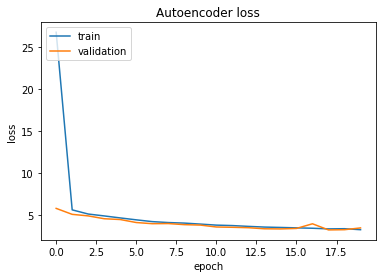

In [ ]:
# Autoencoder
input = Input(shape=(23,))

d=Dense(128, activation='relu')(input)
d=Dense(64, activation='relu')(d)

# learn a representation (encoding) for a set of data
d=Dense(8, activation='relu',name='encoding')(d)

d=Dense(64, activation='relu')(d)
d=Dense(128, activation='relu')(d)

# Linear (i.e. identity) activation function
d=Dense(23, activation='linear')(d)

model = Model(inputs=input, outputs=d)

# defining learning rate and optimizer
adam=Adam(lr=0.0005)

# compiling model
model.compile(optimizer=adam, loss='mse')

# fit model, define batch size and number of epochs
history=model.fit(X_train,X_train,batch_size=32, epochs=20,validation_data=(X_test,X_test))

# saving model
model.save('ae.h5')

with open("OH", 'wb') as fp:
    pickle.dump(oh, fp)

# plotting stats of model
print(history.history.keys())

# "Loss"
plt.plot(history.history['loss'])
plt.plot(history.history['val_loss'])
plt.title('Autoencoder loss')
plt.ylabel('loss')
plt.xlabel('epoch')
plt.legend(['train', 'validation'], loc='upper left')
plt.savefig("ae-loss.png")

with open("X_test-AE", 'wb') as fp:
    pickle.dump(X_test, fp)

with open("y_test-AE", 'wb') as fp:
    pickle.dump(y_test, fp)

In [ ]:
# Print model inputs, outputs and model summary.
print(model.input)
print(model.outputs)
print(model.summary())

Tensor("input_3:0", shape=(?, 23), dtype=float32)
[<tf.Tensor 'dense_15/BiasAdd:0' shape=(?, 23) dtype=float32>]
_________________________________________________________________
Layer (type)                 Output Shape              Param #   
input_3 (InputLayer)         (None, 23)                0         
_________________________________________________________________
dense_11 (Dense)             (None, 128)               3072      
_________________________________________________________________
dense_12 (Dense)             (None, 64)                8256      
_________________________________________________________________
encoding (Dense)             (None, 8)                 520       
_________________________________________________________________
dense_13 (Dense)             (None, 64)                576       
_________________________________________________________________
dense_14 (Dense)             (None, 128)               8320      
_____________________________

In [ ]:
#getting data
with open('features', 'rb') as fp:
    X=pickle.load(fp)

with open('labels', 'rb') as fp:
    y=pickle.load(fp)

In [ ]:
# Get features from the AutoEncoder model

# call previous model
#model=load_model('ae.h5')
layer_name = 'encoding'
intermediate_layer_model = Model(inputs=model.input,
                            outputs=model.get_layer(layer_name).output)

# convert predicted model to an array to identify features
newfeatures=np.array(intermediate_layer_model.predict(X))

# print shape of predicted new features
print(newfeatures.shape)

# splitting predicted new features into training and testing
X_train, X_test, y_train, y_test=train_test_split(newfeatures,y,test_size=0.2, random_state=42, shuffle=True)

print(y_train.shape)

# Write a pickled representation of new features to ae_features.
with open("ae_features", 'wb') as fp:
    pickle.dump(newfeatures, fp)

# Import
from sklearn.ensemble import RandomForestClassifier

# Random Forest Classifier - identify number of trees (40) + no. of processors (4) allowed to use
clf=RandomForestClassifier(n_estimators=40,n_jobs=4)

# fit the training data
clf.fit(X_train,y_train)

# Print Accuracy
print("Testing Accuracy after AutoEncoder and Random Forest: {}%".format(100*clf.score(X_test,y_test)))

(98304, 8)
(78643,)
Testing Accuracy after AutoEncoder and Random Forest: 83.25110625095367%


In [ ]:
# import relevant libraries
import numpy as np
import matplotlib.pyplot as plt
from tqdm import tqdm
import csv
from matplotlib import style
import string
from collections import Counter
import sys
import pickle
import glob
from keras.layers import Dense
from keras.layers import LSTM
from keras.models import Model
from keras.layers import Input, Dense, Flatten, Dropout
from keras.optimizers import Adam
from keras.preprocessing.sequence import pad_sequences
from sklearn.model_selection import train_test_split
from sklearn.preprocessing import OneHotEncoder
from keras.models import load_model

In [ ]:
# ADDED

# Load previous auto encoder model
model=load_model('ae.h5')
# learn a representation (encoding) for a set of data
layer_name = 'encoding'

# build intermediate layer model
intermediate_layer_model = Model(inputs=model.input,
                            outputs=model.get_layer(layer_name).output)

# convert models predicted feats to array
newfeatures=np.array(intermediate_layer_model.predict(X))

# print shape of new features
print(newfeatures.shape)

# split train/test
X_train, X_test, y_train, y_test=train_test_split(newfeatures,y,test_size=0.2, random_state=42, shuffle=True)

# print y_train shaoe
print(y_train.shape)

with open("ae_features", 'wb') as fp:
    pickle.dump(newfeatures, fp)

(98304, 8)
(78643,)


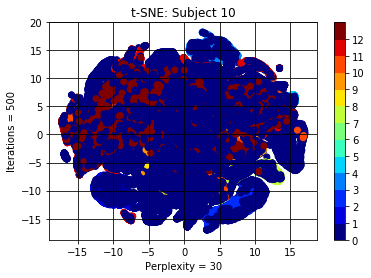

Original Data Dimension: Subject 10 (98304, 23)
Dimensions after t-SNE: Subject 10 (98304, 2)
KL-divergence for subject 10:  4.203800678253174


In [ ]:
from time import time
import numpy as np
import matplotlib.pyplot as plt
from matplotlib import offsetbox
from sklearn import manifold, datasets, decomposition, ensemble,discriminant_analysis, random_projection
from sklearn.manifold import TSNE

tsne = TSNE(n_components=2, random_state=0,perplexity=30,learning_rate=150,n_iter=500)
X_tsne = tsne.fit_transform(X)

plt.title('t-SNE: Subject 10')
plt.scatter(X_tsne[:, 0], X_tsne[:, 1], c=y, cmap=plt.cm.get_cmap("jet", 13), label='Centroids')
plt.colorbar(ticks=range(13))
plt.clim(0, 13)
plt.ylabel('Iterations = 500')
plt.xlabel('Perplexity = 30')
plt.rc('grid', linestyle="-", color='black')
plt.grid(True)
plt.show()

## ORIGINAL DATA DIMENSIONS
print('Original Data Dimension: Subject 10',np.array(X).shape)

## DIMENSIONS AFTER t-SNE
print('Dimensions after t-SNE: Subject 10',np.array(X_tsne).shape)

## KL-divergence
print("KL-divergence for subject 10: ", tsne.kl_divergence_)
